<a href="https://colab.research.google.com/github/subramanian72/Final-Project/blob/main/GuviRatings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary Libraries

In [57]:
# Import necessary Libraries

import pandas as pd
import numpy as np
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

# Get the data

In [58]:
df = pd.read_csv("3.1-data-sheet-guvi-courses.csv")


In [59]:
df.shape

(3680, 12)

In [60]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [61]:
df = df.dropna()

In [62]:
df.shape

(3676, 12)

In [63]:
df['level'].unique()

array(['Beginner Level', 'Expert Level', 'All Levels',
       'Intermediate Level'], dtype=object)

<ipython-input-64-5fae30ba4060>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cbar=False,cmap='RdBu')
<ipython-input-64-5fae30ba4060>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
course_id,1.000000,0.144206,-0.166254,-0.058279,-0.024102,0.054031,-0.056799
price,0.144206,1.000000,0.050555,0.113423,0.330233,0.031643,0.293245
num_subscribers,-0.166254,0.050555,1.000000,0.650761,0.158092,-0.007353,0.161844
num_reviews,-0.058279,0.113423,0.650761,1.000000,0.242986,0.004137,0.228842
num_lectures,-0.024102,0.330233,0.158092,0.242986,1.000000,-0.037170,0.801630
Rating,0.054031,0.031643,-0.007353,0.004137,-0.037170,1.000000,0.000650
content_duration,-0.056799,0.293245,0.161844,0.228842,0.801630,0.000650,1.000000


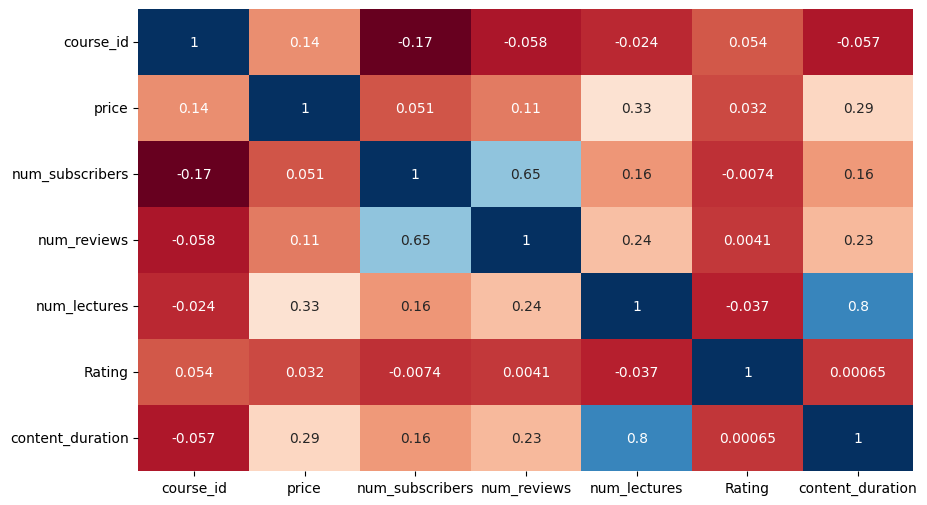

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap='RdBu')
df.corr()

In [65]:
df.drop('course_id', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)
df.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,Learn HTML5 Programming From Scratch,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,Coding for Entrepreneurs Basic,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,The Web Developer Bootcamp,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,Build Your First Website in 1 Week with HTML5 ...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,The Complete Web Developer Course 2.0,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [66]:
df['year'] = pd.to_datetime(df['published_timestamp']).dt.year
df['month'] = pd.to_datetime(df['published_timestamp']).dt.month



In [11]:
df

,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,year,month
0,Learn HTML5 Programming From Scratch,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development,2013,2
1,Coding for Entrepreneurs Basic,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development,2013,6
2,The Web Developer Bootcamp,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development,2015,11
3,Build Your First Website in 1 Week with HTML5 ...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development,2014,4
4,The Complete Web Developer Course 2.0,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,Learn to Play Sweet Child of Mine,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments,2017,6
3676,Coaching Course: Rhythm Instruction for Music ...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments,2017,3
3677,Learn Pirates of the Caribbean by Ear on the P...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments,2017,5
3678,Learn to Play Piano Like a Pro - Easy Piano Co...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments,2017,5


In [67]:
df = df.drop('published_timestamp',1)


<ipython-input-67-903a852a1539>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('published_timestamp',1)


In [13]:
df.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,year,month
0,Learn HTML5 Programming From Scratch,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development,2013,2
1,Coding for Entrepreneurs Basic,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development,2013,6
2,The Web Developer Bootcamp,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,Subject: Web Development,2015,11
3,Build Your First Website in 1 Week with HTML5 ...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,Subject: Web Development,2014,4
4,The Complete Web Developer Course 2.0,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,Subject: Web Development,2016,3


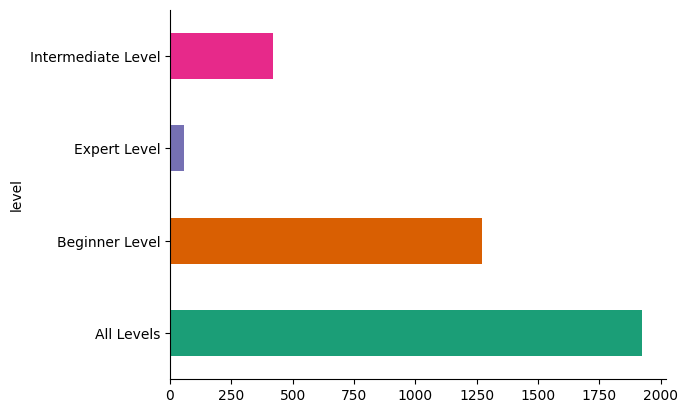

In [68]:
# @title level

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

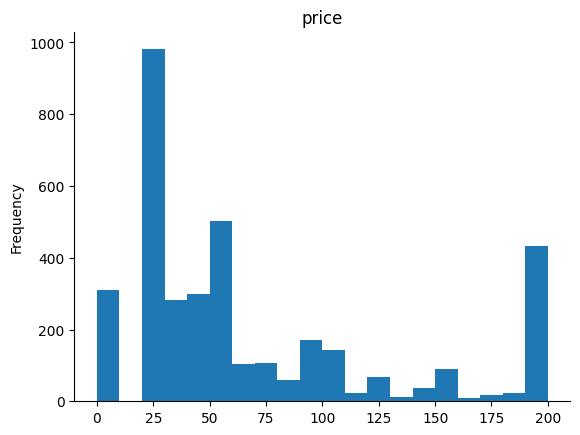

In [69]:
# @title price

from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

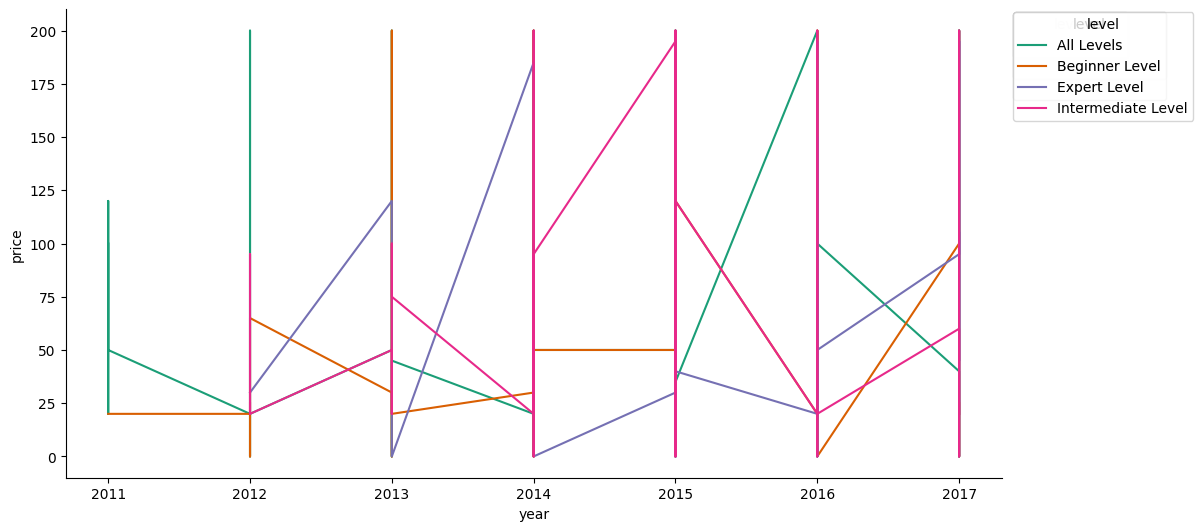

In [70]:
# @title year vs price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('level')):
  _plot_series(series, series_name, i)
  fig.legend(title='level', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

In [71]:
#Object columns

obj=df.select_dtypes(include=object).columns
pd.DataFrame(obj,columns=['Object Columns'])

,Object Columns
0,course_title
1,level
2,subject


In [72]:
df['price'].value_counts()

20.0     828
50.0     468
0.0      311
200.0    295
40.0     216
30.0     166
25.0     153
95.0     153
100.0    133
195.0    128
35.0     116
150.0     88
45.0      83
75.0      80
60.0      75
120.0     37
55.0      35
85.0      31
125.0     30
65.0      30
80.0      29
145.0     27
70.0      26
90.0      19
180.0     17
115.0     16
175.0     13
105.0     11
140.0     10
190.0     10
135.0      8
110.0      8
165.0      6
185.0      6
170.0      5
160.0      4
130.0      3
155.0      2
Name: price, dtype: int64

In [ ]:
#To remove the Rows where price is 0

# df = df[df['price'] != 0]


In [19]:
df.shape

(3676, 11)

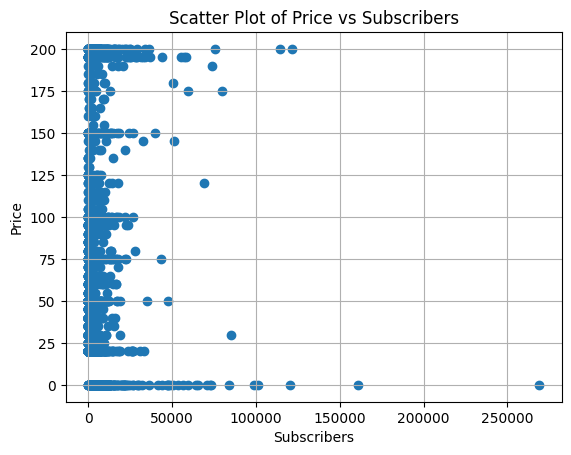

In [73]:
# Scatter plot Subscribers Vs Price

df = pd.DataFrame(df)

# Scatter plot
plt.scatter(df['num_subscribers'], df['price'])
plt.title('Scatter Plot of Price vs Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Price')
plt.grid(True)
plt.show()


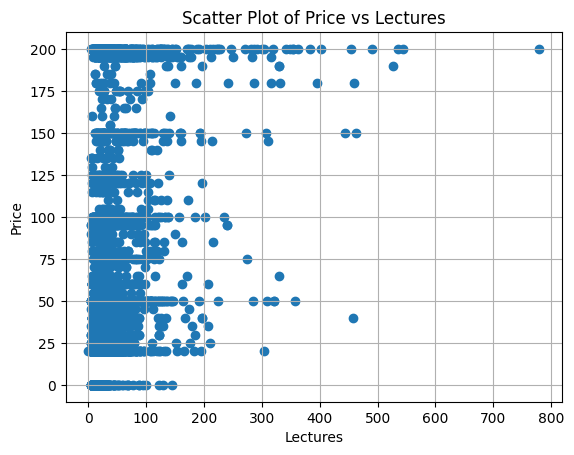

In [74]:
# Scatter plot Lecturers Vs Price

df = pd.DataFrame(df)

# Scatter plot
plt.scatter(df['num_lectures'], df['price'])
plt.title('Scatter Plot of Price vs Lectures')
plt.xlabel('Lectures')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
def review_counter(year, start_month, end_month):
    data = df[(df.year == year) & (df.month >= start_month) & (df.month <= end_month)]
    ratings = list(data.groupby(['month']).Rating.count())
    return ratings

In [ ]:
def rating_counter(course, year, start_month, end_month):
    data = df[(df.year == year) & (df.month >= start_month) & (df.month <= end_month)]
    data = data.loc[data['course_title'] == course]
    ratings = list(data.groupby(['month']).Rating.count())
    return ratings

In [ ]:
def perfect_rating_ratio(course):
    data = df[df.course_title == course]
    ratio = data[data.Rating==5].Rating.count()/data.Rating.count()
    return ratio

In [22]:
course_names = list(df.course_title.unique())

In [23]:
course_names

['Learn HTML5 Programming From Scratch',
 'Coding for Entrepreneurs Basic',
 'The Web Developer Bootcamp',
 'Build Your First Website in 1 Week with HTML5 and CSS3',
 'The Complete Web Developer Course 2.0',
 'Web Design for Web Developers: Build Beautiful Websites!',
 'Learn Javascript & JQuery From Scratch',
 'Practical PHP: Master the Basics and Code Dynamic Websites',
 'JavaScript: Understanding the Weird Parts',
 'Angular 4 (formerly Angular 2) - The Complete Guide',
 'Beginner Photoshop to HTML5 and CSS3',
 'Web Development By Doing: HTML / CSS From Scratch',
 'HTML and CSS for Beginners - Build a Website & Launch ONLINE',
 'Become a Web Developer from Scratch',
 'Quickstart AngularJS',
 'Learn Responsive Web Development from Scratch',
 'Learn and Understand AngularJS',
 'Learn and Understand NodeJS',
 'The Complete HTML & CSS Course - From Novice To Professional',
 'Complete PHP Course With Bootstrap3 CMS System & Admin Panel',
 'Build Websites from Scratch with HTML & CSS',
 'M

In [ ]:
df.course_title.value_counts()

Creating an animated greeting card via Google Slides            3
Acoustic Blues Guitar Lessons                                   3
Improved SEO with Rich Snippets and MicroData                   2
The Complete Web Developer Masterclass: Beginner To Advanced    2
How to Make a Wordpress Website 2017                            2
                                                               ..
Hedge Fund Trading System                                       1
The Complete Bitcoin Course: Get .001 Bitcoin In Your Wallet    1
The Complete Investment Banking Course 2017                     1
Dividend Investing: Build Your Portfolio for a Better Future    1
4 Week Rhythm Mastery                                           1
Name: course_title, Length: 3663, dtype: int64

In [24]:
df.dtypes

course_title         object
price               float64
num_subscribers     float64
num_reviews         float64
num_lectures        float64
level                object
Rating              float64
content_duration    float64
subject              object
year                  int64
month                 int64
dtype: object

In [75]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['course_title', 'level', 'subject'], dtype='object')


In [76]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3679
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_title      3676 non-null   int64  
 1   price             3676 non-null   float64
 2   num_subscribers   3676 non-null   float64
 3   num_reviews       3676 non-null   float64
 4   num_lectures      3676 non-null   float64
 5   level             3676 non-null   int64  
 6   Rating            3676 non-null   float64
 7   content_duration  3676 non-null   float64
 8   subject           3676 non-null   int64  
 9   year              3676 non-null   int64  
 10  month             3676 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 473.7 KB
None


In [77]:
df.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,year,month
0,2108,0.0,268923.0,8629.0,45.0,1,0.82,10.5,3,2013,2
1,755,0.0,161029.0,279.0,27.0,2,0.69,3.5,3,2013,6
2,3296,200.0,121584.0,27445.0,342.0,1,0.89,43.0,3,2015,11
3,590,0.0,120291.0,5924.0,30.0,0,0.78,3.0,3,2014,4
4,3227,200.0,114512.0,22412.0,304.0,1,0.55,30.5,3,2016,3


In [ ]:
# To hardcode the object variables

encoded_data = pd.get_dummies(df)

print('one encoded data')
print(encoded_data)


one encoded data
      price  num_subscribers  num_reviews  num_lectures  Rating  \
0       0.0         268923.0       8629.0          45.0    0.82   
1       0.0         161029.0        279.0          27.0    0.69   
2     200.0         121584.0      27445.0         342.0    0.89   
3       0.0         120291.0       5924.0          30.0    0.78   
4     200.0         114512.0      22412.0         304.0    0.55   
...     ...              ...          ...           ...     ...   
3675   20.0              0.0          0.0          23.0    0.31   
3676  125.0              0.0          0.0           7.0    0.06   
3677   20.0              0.0          0.0           6.0    0.08   
3678   35.0              0.0          0.0          13.0    0.78   
3679   20.0              0.0          0.0          28.0    0.01   

      content_duration  year  month  \
0            10.500000  2013      2   
1             3.500000  2013      6   
2            43.000000  2015     11   
3             3.000000

In [ ]:
encoded_data.head()

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,year,month,course_title_#1 Piano Hand Coordination: Play 10th Ballad in Eb Key songs,course_title_#10 Hand Coordination - Transfer Chord Ballad 9 - C & Bb Key,...,course_title_６時間でインターバンク市場を攻略！最短距離でトレード基礎力,course_title_７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,level_All Levels,level_Beginner Level,level_Expert Level,level_Intermediate Level,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Subject: Web Development
0,0.0,268923.0,8629.0,45.0,0.82,10.5,2013,2,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,161029.0,279.0,27.0,0.69,3.5,2013,6,0,0,...,0,0,0,0,1,0,0,0,0,1
2,200.0,121584.0,27445.0,342.0,0.89,43.0,2015,11,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,120291.0,5924.0,30.0,0.78,3.0,2014,4,0,0,...,0,0,1,0,0,0,0,0,0,1
4,200.0,114512.0,22412.0,304.0,0.55,30.5,2016,3,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df[df['Rating'].apply(lambda x: not str(x).isnumeric())]

,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,year,month
0,Learn HTML5 Programming From Scratch,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development,2013,2
1,Coding for Entrepreneurs Basic,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development,2013,6
2,The Web Developer Bootcamp,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development,2015,11
3,Build Your First Website in 1 Week with HTML5 ...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development,2014,4
4,The Complete Web Developer Course 2.0,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development,2016,3
...,...,...,...,...,...,...,...,...,...,...,...
3675,Learn to Play Sweet Child of Mine,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,2017,6
3676,Coaching Course: Rhythm Instruction for Music ...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,2017,3
3677,Learn Pirates of the Caribbean by Ear on the P...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,2017,5
3678,Learn to Play Piano Like a Pro - Easy Piano Co...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,2017,5


In [ ]:
df['Rating']

0       0.82
1       0.69
2       0.89
3       0.78
4       0.55
        ... 
3675    0.31
3676    0.06
3677    0.08
3678    0.78
3679    0.01
Name: Rating, Length: 3676, dtype: float64

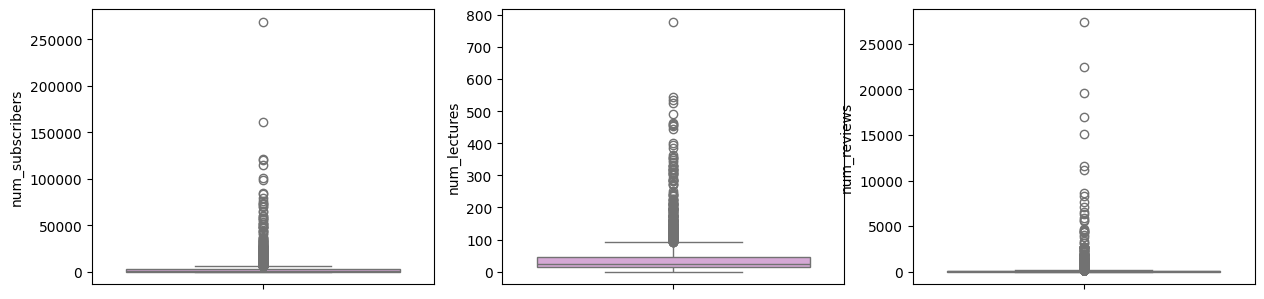

In [78]:
#Outlayers

num_features=['num_subscribers' ,'num_lectures','num_reviews']

i=1
plt.figure(figsize=(15,25))
for feature in num_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature],color='#DDA0DD')
    i+=1



In [79]:
#Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# X = encoded_data.drop('Rating', axis=1)
# y = encoded_data['Rating']

X = df.drop('Rating', axis=1)
y = df['Rating']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r_squared_lr = r2_score(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("Mean Squared Error:", mse_lr)
print("Mean absolute error:", mae_lr)
print("R Squared: ", r_squared_lr)
print("Root mean square error: ", rmse_lr)

Mean Squared Error: 0.10669191300666987
Mean absolute error: 0.2898386725824279
R Squared:  0.03092992692867025
Root mean square error:  0.32663728049117396


In [80]:
#Decision tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = df.drop('Rating', axis=1)
y = df['Rating']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

predict_train = dtr.predict(X_train)
predict_test = dtr.predict(X_test)
R2Score_dt = r2_score(y_test, predict_test)

mse_dt = mean_squared_error(y_test, predict_test)

print("Train Error:", mean_absolute_error(y_train,predict_train))
print("Test Error:", mean_absolute_error(y_test,predict_test))
print("R2Score:", R2Score_dt)
print("Mean square error: ", mse_dt)

Train Error: 4.081632653067781e-05
Test Error: 0.2531385869565218
R2Score: -0.209902841920506
Mean square error:  0.1332069293478261


In [81]:
#Random forest regressor

from sklearn.ensemble import RandomForestRegressor

X = df.drop('Rating', axis=1)
y = df['Rating']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(random_state=0, n_estimators=10)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse_rf}')

r2_rf = r2_score(y_test, predictions)
print(f'R-squared: {r2_rf}')

Mean Squared Error: 0.07924276902173913
R-squared: 0.28024726708695735


In [82]:
#XG Boost Regressor

import xgboost as xg

X = df.drop('Rating', axis=1)
y = df['Rating']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)

# Instantiation
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred = xgb_r.predict(X_test)

# RMSE Computation
mse_xg = mean_squared_error(y_test, pred)
print("MSE : % f" %(mse_xg))

r2_xg = r2_score(y_test, pred)
print(f'R-squared: {r2_xg}')

MSE :  0.074995
R-squared: 0.33671753368897217


In [90]:
#Compare all the regressor models

MSE_level=[mse_lr,mse_dt,mse_rf, mse_xg]
R2_level=[r_squared_lr, R2Score_dt,  r2_rf, r2_xg]

col={'Mean Square Error':MSE_level}
models=['Logistic Regression','Decision Tree','Random Forest', 'XG Boost']
df=DataFrame(data=col,index=models)
# df["R2Score"] = R2_level
# df = df.assign(R2Score=[r_squared_lr, R2Score_dt,  r2_rf, r2_xg])
df


,Mean Square Error
Logistic Regression,0.106692
Decision Tree,0.133207
Random Forest,0.079243
XG Boost,0.074995


<Axes: >

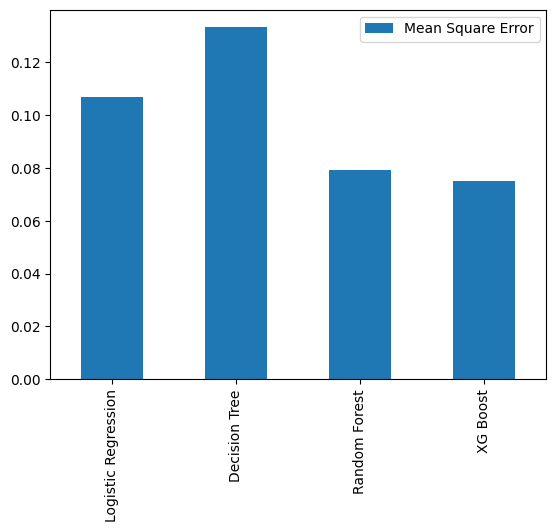

In [91]:
df.plot(kind="bar")